# Fast linear algebra libraries

Estimations using Deep Neural Networks involve large amount of operations that can be paralellized efficiently, such as matrix multiplications or applying non - linear function to every element in a matrix. Hence efficient libaries for such computations were developed. Examples of these libraries are `theano` and `tensorflow`.

This tutorial provides quick introduction into usage of `theano` library.

### Simple dataset

A cos function with noise added.

In [1]:
import numpy as np
import theano
import theano.tensor as T

def rnd(*args):
    return np.random.randn(*args).astype(theano.config.floatX)

X = rnd(100, 1)
y = X*0.8+ 1.0 + rnd(100, 1) * 0.05
y = np.cos(y*3.0) + 1.0

### Define a computational graph here

In [3]:
# placeholders for inputs
Xv = T.matrix('x')
yv = T.matrix('y')

# variables of NN
Wv = theano.shared(rnd(1, 8), name="W")
bv = theano.shared(rnd(8), name="b")
sv = theano.shared(rnd(8, 1), name="s")
cv = theano.shared(rnd(1, 1), name="c")

# computational graph of NN

# hidden layer
Hv = T.dot(Xv, Wv) + bv
#Hv = T.maximum(Hv, Hv*0.05)
#Hv = T.dot(Hv, sv) + cv

# objective
cost = T.mean((yv - Hv) ** 2)

# automatic differentiation
V = [Wv, bv] # , sv, cv
G = T.grad(cost, V)

# compile the procedure for estimations
estimate = theano.function(inputs=[Xv], outputs=[Hv])

# compile procedure for the gradient descent
gradstep = theano.function(inputs=[Xv, yv], outputs=[cost], updates=[
    [v, v - 0.01*g] for v, g in zip(V, G)
])

The output file is available at g.png


<IPython.core.display.Javascript object>


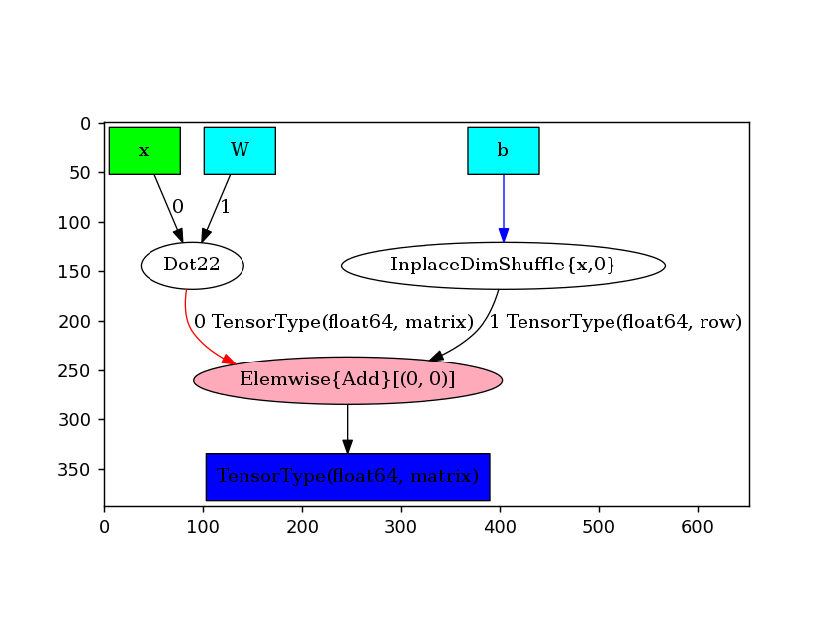

In [4]:
theano.printing.pydotprint(estimate, outfile="g.png", var_with_name_simple=True) 

%matplotlib notebook
import matplotlib.pyplot as plt

plt.imshow(plt.imread('g.png'))
plt.show()

In [5]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

# get outputs for the model on domain of dataset
Xm = np.linspace(-3.2, 3.2, 200)[:, np.newaxis]
ym = estimate(Xm)[0]

p = figure(title="Neural net in theano", plot_height=300, plot_width=600, y_range=(-5,5))

m = p.line(Xm[:,0], ym[:,0], color="blue", line_width=3, legend="NN outputs")
r = p.scatter(X[:,0], y[:,0], color="red", legend="data")

# will print here stats
out = widgets.Output()

def update(event):
    for i in range(100):
        score = gradstep(X, y)
        
    yp = estimate(Xm)[0]
    m.data_source.data['y'] = yp[:, 0]
    push_notebook()
    
    with out:
        clear_output(wait=True)
        print(score)
        
show(p, notebook_handle=True)

Loading BokehJS ...

In [6]:
step_b = widgets.Button(description="Iterate")
step_b.on_click(update)

display(widgets.VBox([
    widgets.HBox([step_b]), 
    out
]))

VBox(children=(HBox(children=(Button(description='Iterate', style=ButtonStyle()),)), Output()))

ValueError: Shape mismatch: y has 8 cols but z has 1 cols
Apply node that caused the error: Gemm{no_inplace}(y, TensorConstant{-1.0}, x, W, TensorConstant{1.0})
Toposort index: 4
Inputs types: [TensorType(float64, matrix), TensorType(float64, scalar), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, scalar)]
Inputs shapes: [(100, 1), (), (100, 1), (1, 8), ()]
Inputs strides: [(8, 8), (), (8, 8), (64, 8), ()]
Inputs values: ['not shown', array(-1.0), 'not shown', 'not shown', array(1.0)]
Outputs clients: [[Elemwise{Add}[(0, 1)](Elemwise{neg,no_inplace}.0, Gemm{no_inplace}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.